<a href="https://colab.research.google.com/github/weichaung/hello-world/blob/master/exploration_and_exploitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#initialize
np.random.seed(20)
plt.style.use('ggplot')
parameters = {'n_testbeds':15, 'mean':0, 'variance':1, 'reward_range':(2, -2), 'n_avg_reward':1000}
iterations = 1000
#stationary problem just use sample average method
step_size = -1

plot the q values over iterations

In [0]:
def plot(iterations=500, reward_range=(2,-2)):
  plt.legend()
  plt.xlabel('iteration')
  plt.ylabel('q_chosen_values')
  plt.xticks(np.arange(0, iterations+1,100))
  plt.yticks(np.arange(0, reward_range[0]+0.1,0.2))
  plt.tight_layout()

simulate testbeds,
shape: (num_avg, num_testbeds)

In [0]:
def create_testbeds(num=10, reward_range=(2,-2), avg_over=2000):
  testbeds_mean = np.random.uniform(reward_range[1], reward_range[0], (avg_over, num))
  
  return testbeds_mean

basic function

In [0]:
def basic_func(epsilon, step_size, iterations, q_star, q, n_t, n_testbeds, mean, variance, n_avg_reward, q_chosen):
  for i in range(1, iterations+1):
    for n1 in range(n_avg_reward):
      reward = np.zeros((n_avg_reward, n_testbeds), np.float16)
      if i==1:
        testbed_chosen = np.random.randint(0, n_testbeds)
      elif np.random.rand()<epsilon:
        testbed_chosen = np.random.randint(0, n_testbeds)
      else:
        testbed_chosen = np.argmax(q[n1, :], axis=0)
      n_t[n1, testbed_chosen] += 1
      reward[n1, testbed_chosen] = np.random.normal(q_star[n1, testbed_chosen]+mean, variance**(1/2))
      if step_size==-1:
        q[n1, testbed_chosen] = (reward[n1, testbed_chosen]-q[n1, testbed_chosen])/n_t[n1, testbed_chosen] + q[n1, testbed_chosen]
      else:
        q[n1, testbed_chosen] = (reward[n1, testbed_chosen]-q[n1, testbed_chosen])*step_size + q[n1, testbed_chosen]
      q_chosen[i-1, n1] = q[n1, testbed_chosen].copy()
    if i%100==0:
      print(f'{i}th iteration: q_chosen (average over {n_avg_reward}) = {q_chosen[i-1].mean(0)}')
  return q_chosen.mean(1)

UCB function

In [0]:
def ucb_func(c, step_size, iterations, q_star, q, n_t, n_testbeds, mean, variance, n_avg_reward, q_chosen):
  for i in range(1, iterations+1):
    for n1 in range(n_avg_reward):
      add_limit = np.zeros((n_avg_reward,n_testbeds),np.float16)
      reward = np.zeros((n_avg_reward, n_testbeds), np.float16)
      if i==1:
        testbed_chosen = np.random.randint(0, n_testbeds)
      else:
        addlimit = q[n1] + c*((np.log(np.sum(n_t[n1]))/(n_t[n1]+1))**(1/2))
        testbed_chosen = np.argmax(q[n1, :]+addlimit, axis=0)
      n_t[n1, testbed_chosen] += 1
      reward[n1, testbed_chosen] = np.random.normal(q_star[n1, testbed_chosen]+mean, variance**(1/2))
      if step_size==-1:
        q[n1, testbed_chosen] = (reward[n1, testbed_chosen]-q[n1, testbed_chosen])/n_t[n1, testbed_chosen] + q[n1, testbed_chosen]
      else:
        q[n1, testbed_chosen] = (reward[n1, testbed_chosen]-q[n1, testbed_chosen])*step_size + q[n1, testbed_chosen]
      q_chosen[i-1, n1] = q[n1, testbed_chosen].copy()
    if i%100==0:
      print(f'{i}th iteration: q_chosen (average over {n_avg_reward}) = {q_chosen[i-1].mean(0)}')
  return q_chosen.mean(1)

define the model which returns 'q' values for the actions that the agent has selected

In [0]:
def model(parameters, mode='greedy', epsilon=0., step_size=-1, q1=0, c=2, iterations=500):
  (n_testbeds, mean, variance, reward_range, n_avg_reward) = parameters.values()
  q_star = create_testbeds(n_testbeds, reward_range, n_avg_reward)
  q = np.full((n_avg_reward, n_testbeds), q1, np.float16)
  n_t = np.zeros((n_avg_reward, n_testbeds), np.float16)
  q_chosen = np.zeros((iterations, n_avg_reward), np.float16)

  print('*'*20)
  print(f'mode: {mode}\nepsilon: {epsilon}\nstep_size: {step_size}\ninitial_q1: {q1}\niterations: {iterations}\nc: {c}')
  print('*'*20)

  if mode=='greedy' or mode=='epsilon_greedy' or mode=='optimistic_initial_values' or mode=='epsilon_greedy_and_optimistic_initial_values':
    q_chosen = basic_func(epsilon, step_size, iterations, q_star, q, n_t, n_testbeds, mean, variance, n_avg_reward, q_chosen)
  elif mode=='upper_confidence_bound':
    q_chosen = ucb_func(c, step_size, iterations, q_star, q, n_t, n_testbeds, mean, variance, n_avg_reward, q_chosen)

  return q_chosen.ravel()
        
      

test

********************
mode: greedy
epsilon: 0
step_size: -1
initial_q1: 0
iterations: 1000
c: 0
********************
100th iteration: q_chosen (average over 1000) = 1.201171875
200th iteration: q_chosen (average over 1000) = 1.2021484375
300th iteration: q_chosen (average over 1000) = 1.201171875
400th iteration: q_chosen (average over 1000) = 1.201171875
500th iteration: q_chosen (average over 1000) = 1.201171875
600th iteration: q_chosen (average over 1000) = 1.2001953125
700th iteration: q_chosen (average over 1000) = 1.201171875
800th iteration: q_chosen (average over 1000) = 1.201171875
900th iteration: q_chosen (average over 1000) = 1.2001953125
1000th iteration: q_chosen (average over 1000) = 1.2001953125
********************
mode: epsilon_greedy
epsilon: 0.05
step_size: -1
initial_q1: 0
iterations: 1000
c: 0
********************
100th iteration: q_chosen (average over 1000) = 1.3349609375
200th iteration: q_chosen (average over 1000) = 1.4423828125
300th iteration: q_chosen (ave

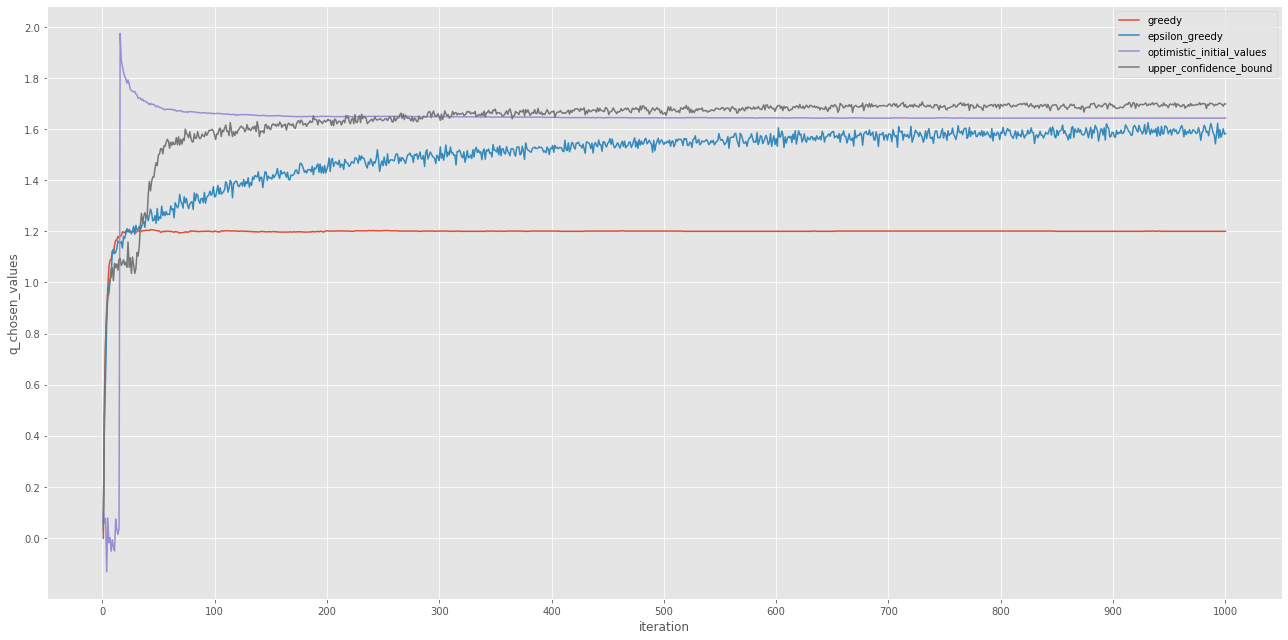

In [0]:
#epsilon: epsilon (float, chance to explore) and 1-epsilon (float, chance to exploit)
epsilon = {'greedy':0, 'epsilon_greedy':0.05, 'optimistic_initial_values':0, 'upper_confidence_bound':0}
#q1: initial bias (a technique of optimistic_initial_values)
q1 = {'greedy':0, 'epsilon_greedy':0, 'optimistic_initial_values':5, 'upper_confidence_bound':0}
#c: the hyperparameter for UCB
c = {'greedy':0, 'epsilon_greedy':0, 'optimistic_initial_values':0, 'upper_confidence_bound':3}
plt.figure(figsize=(18, 9))

for mode in epsilon.keys():
  ys = model(parameters, mode, epsilon[mode], step_size, q1[mode], c[mode], iterations)

  plt.plot(range(1, iterations+1), ys, label=mode)

plot(iterations, parameters['reward_range'])
plt.show()

epsilon_greedy test epsilon: (0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4)

********************
mode: epsilon_greedy
epsilon: 0
step_size: -1
initial_q1: 0
iterations: 1000
c: 0
********************
100th iteration: q_chosen (average over 1000) = 1.203125
200th iteration: q_chosen (average over 1000) = 1.19921875
300th iteration: q_chosen (average over 1000) = 1.2001953125
400th iteration: q_chosen (average over 1000) = 1.1982421875
500th iteration: q_chosen (average over 1000) = 1.2001953125
600th iteration: q_chosen (average over 1000) = 1.2001953125
700th iteration: q_chosen (average over 1000) = 1.2001953125
800th iteration: q_chosen (average over 1000) = 1.2001953125
900th iteration: q_chosen (average over 1000) = 1.2001953125
1000th iteration: q_chosen (average over 1000) = 1.2001953125
********************
mode: epsilon_greedy
epsilon: 0.01
step_size: -1
initial_q1: 0
iterations: 1000
c: 0
********************
100th iteration: q_chosen (average over 1000) = 1.23828125
200th iteration: q_chosen (average over 1000) = 1.2939453125
300th iteration: q_chose

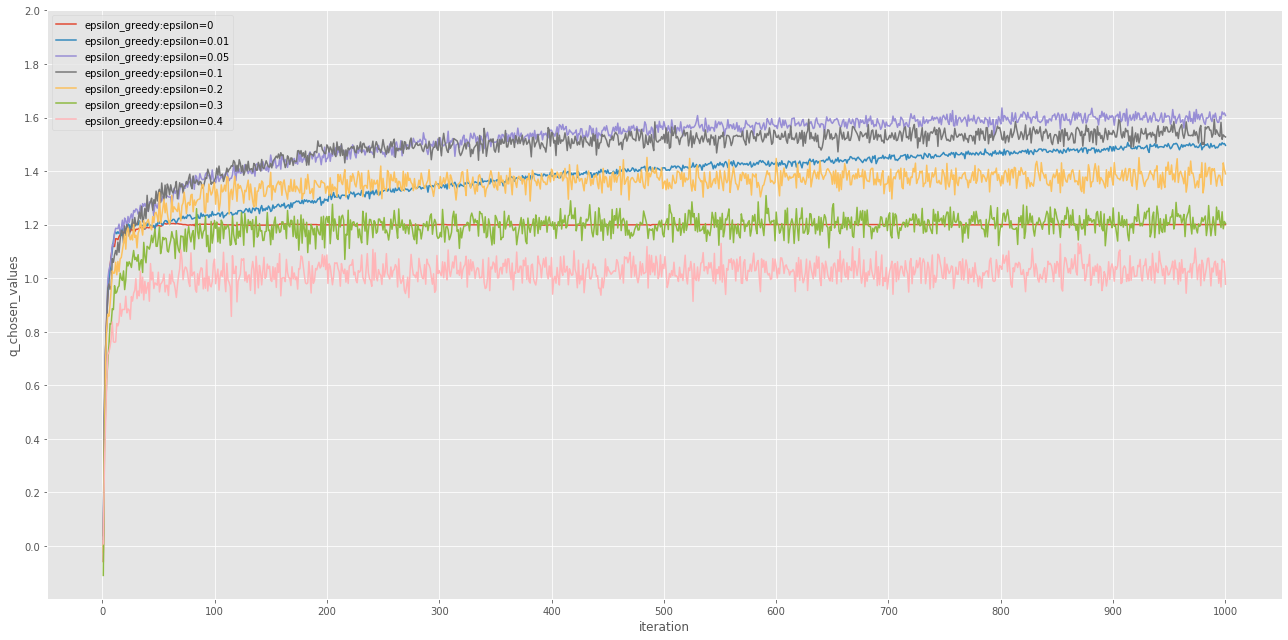

In [0]:
epsilon = (0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4)
q1 = 0
c = 0
mode = 'epsilon_greedy'

plt.figure(figsize=(18, 9))

for ep in epsilon:
  ys = model(parameters, mode, ep, step_size, q1, c, iterations)
  
  plt.plot(range(1, iterations+1), ys, label=mode+':epsilon='+str(ep))

plot(iterations, parameters['reward_range'])
plt.show()

optimistic initial values test q1: (0, 1, 2, 3, 4, 5, 6)

********************
mode: optimistic_initial_values
epsilon: 0
step_size: -1
initial_q1: 0
iterations: 1000
c: 0
********************
100th iteration: q_chosen (average over 1000) = 1.224609375
200th iteration: q_chosen (average over 1000) = 1.2265625
300th iteration: q_chosen (average over 1000) = 1.2255859375
400th iteration: q_chosen (average over 1000) = 1.224609375
500th iteration: q_chosen (average over 1000) = 1.2236328125
600th iteration: q_chosen (average over 1000) = 1.2236328125
700th iteration: q_chosen (average over 1000) = 1.2236328125
800th iteration: q_chosen (average over 1000) = 1.224609375
900th iteration: q_chosen (average over 1000) = 1.224609375
1000th iteration: q_chosen (average over 1000) = 1.224609375
********************
mode: optimistic_initial_values
epsilon: 0
step_size: -1
initial_q1: 1
iterations: 1000
c: 0
********************
100th iteration: q_chosen (average over 1000) = 1.5830078125
200th iteration: q_chosen (average over 1000) = 1.58203125
300th i

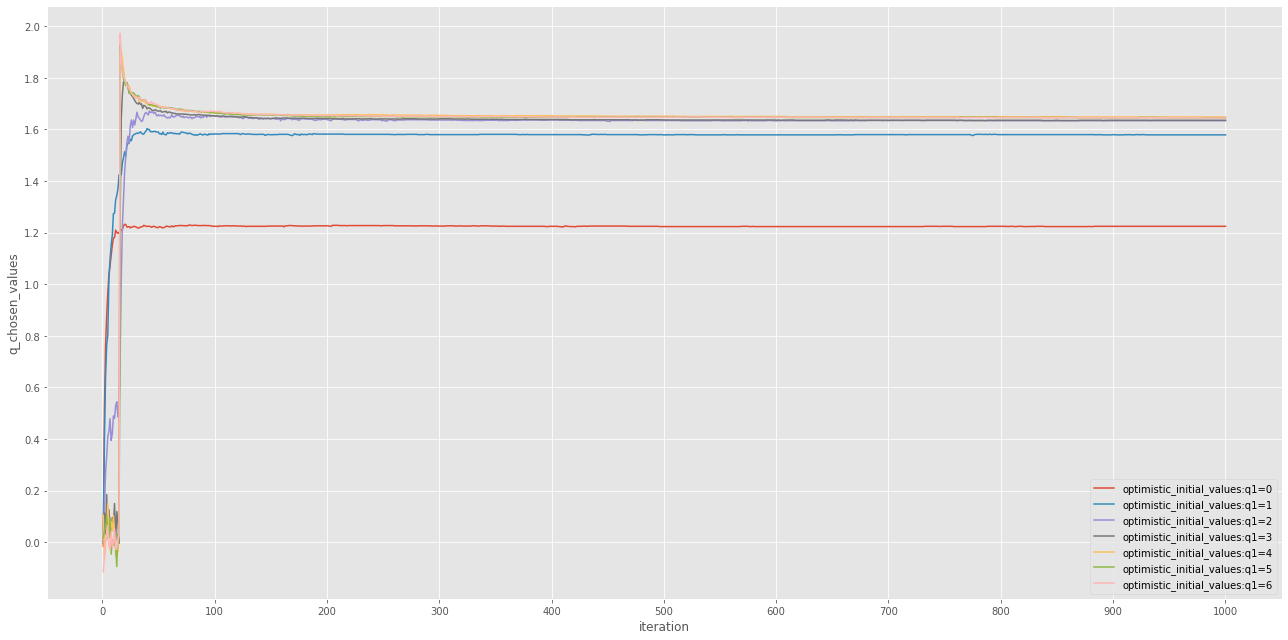

In [0]:
epsilon = 0
#our initial rewards (q_star) are given randomly between -2 and 2
q1 = (0, 1, 2, 3, 4, 5, 6)
c = 0
mode = 'optimistic_initial_values'

plt.figure(figsize=(18, 9))

for q_biased in q1:
  ys = model(parameters, mode, epsilon, step_size, q_biased, c, iterations)
  
  plt.plot(range(1, iterations+1), ys, label=mode+':q1='+str(q_biased))

plot(iterations, parameters['reward_range'])
plt.show()

It turns out that in epsilon-greedy method, the top three epsilon is (0.05, 0.1, 0.01) and in optimistic initial values condition, it seems quite similar whichever the q1 was chosen.
So let's takes the two different methods to compare.

********************
mode: epsilon_greedy_and_optimistic_initial_values
epsilon: 0.05
step_size: -1
initial_q1: 5
iterations: 1000
c: 0
********************
100th iteration: q_chosen (average over 1000) = 1.5927734375
200th iteration: q_chosen (average over 1000) = 1.6015625
300th iteration: q_chosen (average over 1000) = 1.6015625
400th iteration: q_chosen (average over 1000) = 1.6220703125
500th iteration: q_chosen (average over 1000) = 1.6396484375
600th iteration: q_chosen (average over 1000) = 1.6259765625
700th iteration: q_chosen (average over 1000) = 1.6181640625
800th iteration: q_chosen (average over 1000) = 1.650390625
900th iteration: q_chosen (average over 1000) = 1.6181640625
1000th iteration: q_chosen (average over 1000) = 1.6171875
********************
mode: epsilon_greedy_and_optimistic_initial_values
epsilon: 0.1
step_size: -1
initial_q1: 5
iterations: 1000
c: 0
********************
100th iteration: q_chosen (average over 1000) = 1.5078125
200th iteration: q_chosen (a

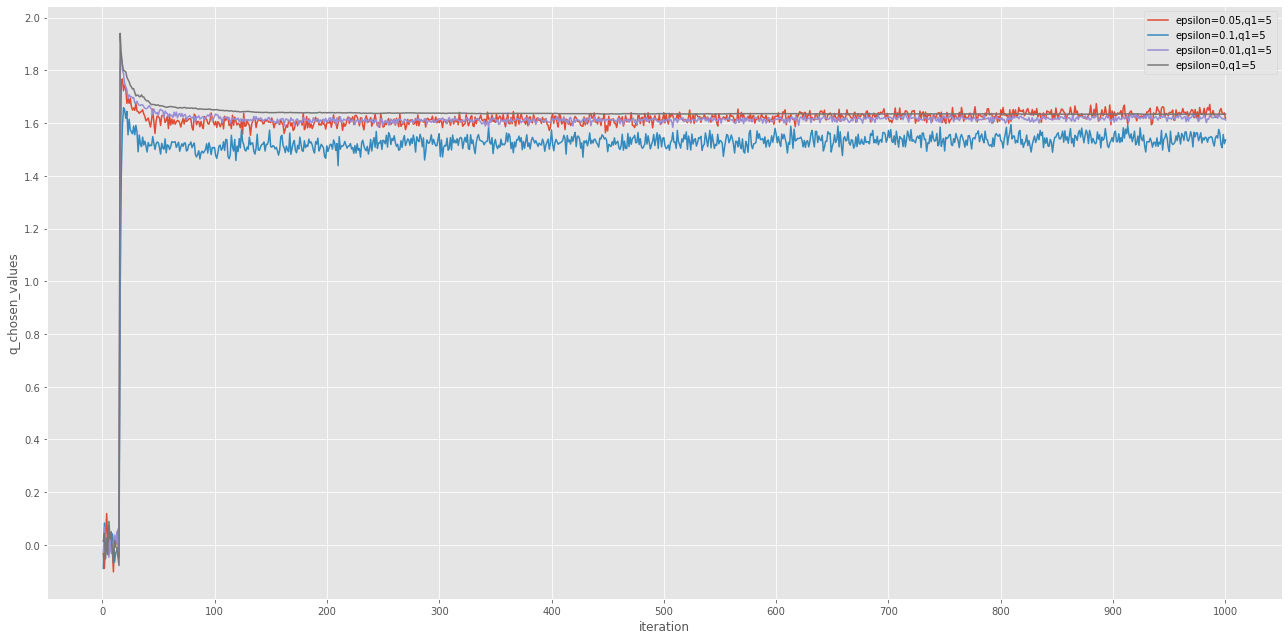

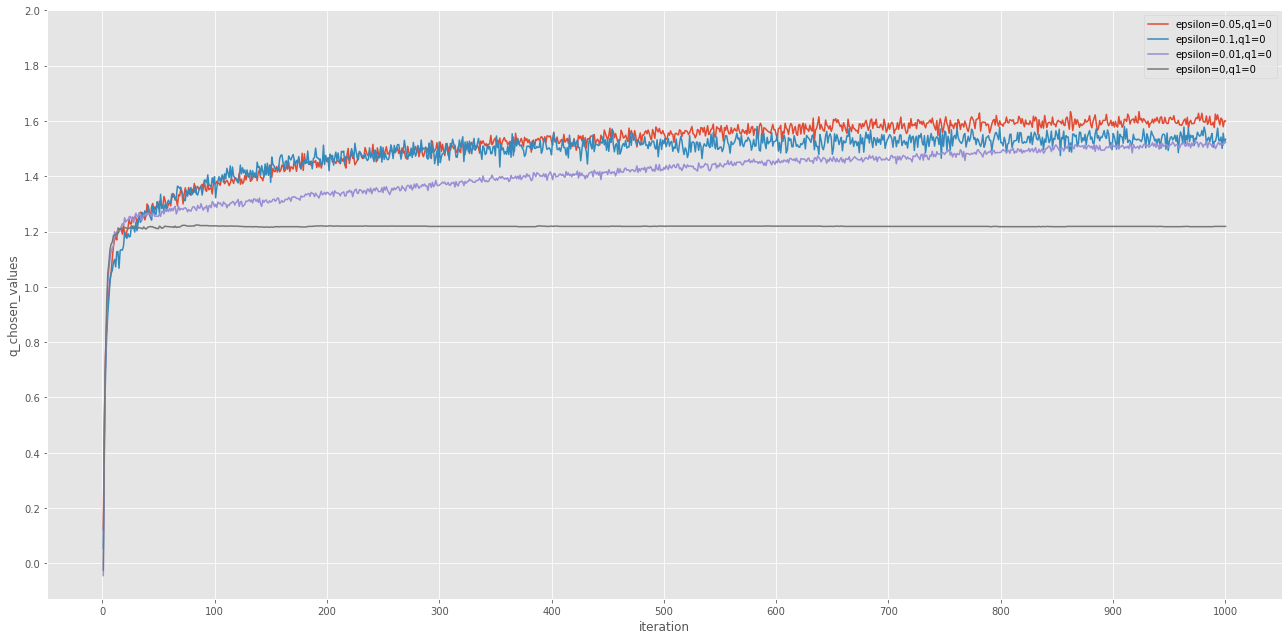

In [0]:
epsilon = (0.05, 0.1, 0.01, 0)
#our initial rewards (q_star) are given randomly between -2 and 2
q1 = (5, 0)
c = 0
mode = 'epsilon_greedy_and_optimistic_initial_values'

for q_biased in q1:
  plt.figure(figsize=(18, 9))
  for ep in epsilon:
    ys = model(parameters, mode, ep, step_size, q_biased, c, iterations)
    plt.plot(range(1, iterations+1), ys, label=f'epsilon={ep},q1={q_biased}')
  plot(iterations, parameters['reward_range'])
plt.show()

upper_confidence_bound test c:(0, 1, 2, 3, 4, 5, 6)

********************
mode: upper_confidence_bound
epsilon: 0
step_size: -1
initial_q1: 0
iterations: 1000
c: 0
********************
100th iteration: q_chosen (average over 1000) = 1.2412109375
200th iteration: q_chosen (average over 1000) = 1.2470703125
300th iteration: q_chosen (average over 1000) = 1.24609375
400th iteration: q_chosen (average over 1000) = 1.244140625
500th iteration: q_chosen (average over 1000) = 1.2431640625
600th iteration: q_chosen (average over 1000) = 1.2431640625
700th iteration: q_chosen (average over 1000) = 1.2451171875
800th iteration: q_chosen (average over 1000) = 1.24609375
900th iteration: q_chosen (average over 1000) = 1.2451171875
1000th iteration: q_chosen (average over 1000) = 1.2451171875
********************
mode: upper_confidence_bound
epsilon: 0
step_size: -1
initial_q1: 0
iterations: 1000
c: 1
********************
100th iteration: q_chosen (average over 1000) = 1.4951171875
200th iteration: q_chosen (average over 1000) = 1.525390625
300th ite

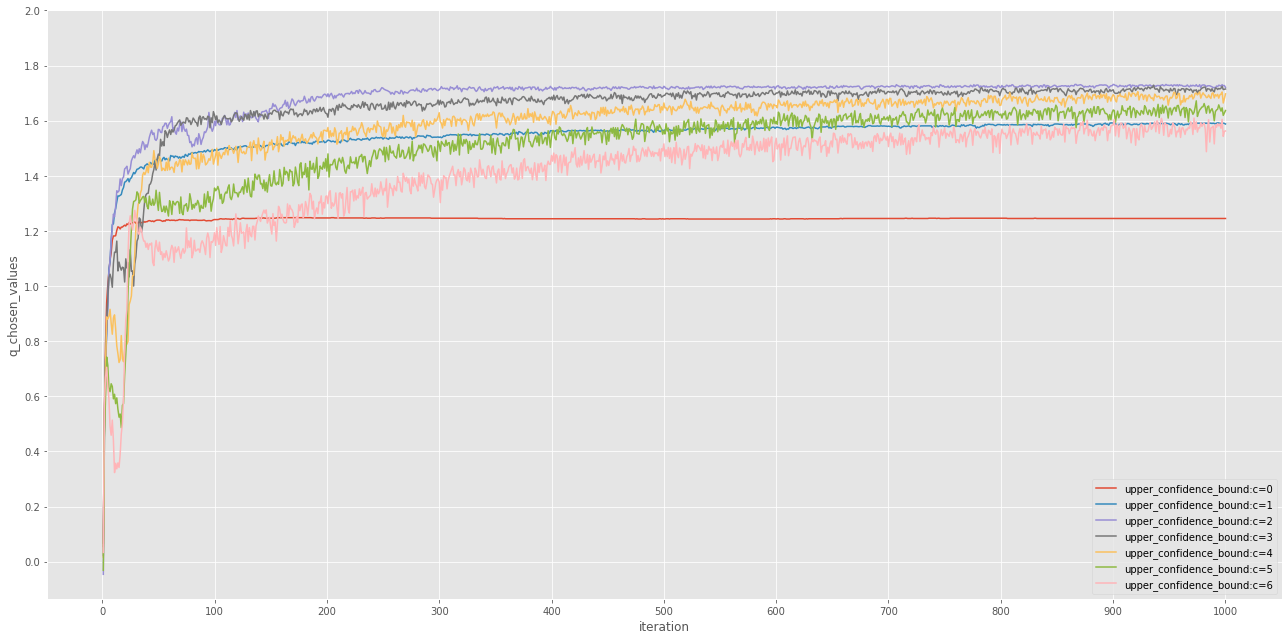

In [0]:
epsilon = 0
q1 = 0
c = (0, 1, 2, 3, 4, 5, 6)
mode = 'upper_confidence_bound'

plt.figure(figsize=(18, 9))

for c_ in c:
  ys = model(parameters, mode, epsilon, step_size, q1, c_, iterations)
  
  plt.plot(range(1, iterations+1), ys, label=mode+':c='+str(c_))

plot(iterations, parameters['reward_range'])
plt.show()